<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Pre-requisites" data-toc-modified-id="Pre-requisites-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-requisites</a></span></li><li><span><a href="#Source-code" data-toc-modified-id="Source-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Source code</a></span></li><li><span><a href="#Nonlinear-model" data-toc-modified-id="Nonlinear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nonlinear model</a></span></li><li><span><a href="#Matlab-scripts" data-toc-modified-id="Matlab-scripts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Matlab scripts</a></span><ul class="toc-item"><li><span><a href="#ODE-solver-ode45m" data-toc-modified-id="ODE-solver-ode45m-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ODE solver <code>ode45m</code></a></span></li><li><span><a href="#ODE-solver-eufix1" data-toc-modified-id="ODE-solver-eufix1-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ODE solver <code>eufix1</code></a></span></li><li><span><a href="#Nonlinear-model" data-toc-modified-id="Nonlinear-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Nonlinear model</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Main</a></span></li></ul></li><li><span><a href="#Simulation-Scenarios" data-toc-modified-id="Simulation-Scenarios-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Simulation Scenarios</a></span></li><li><span><a href="#Simulation-Results" data-toc-modified-id="Simulation-Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Simulation Results</a></span><ul class="toc-item"><li><span><a href="#Scenario-1" data-toc-modified-id="Scenario-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Scenario 1</a></span></li><li><span><a href="#Scenario-2" data-toc-modified-id="Scenario-2-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Scenario 2</a></span></li></ul></li></ul></div>

# Introduction
The objective is to simulate a nonlinear electro-mechanical system with thermal model and static Coulomb friction. We use three ODE solvers, the embedded Matlab solver `ode45`, and two external solvers, the 4th and 5th order Runge-Kutta algorithm `ode45m`, and the basic Euler algorithm `eufix1`.

# Pre-requisites
- Previous post of [DC motor modelling](/blog/DCmotor/).
- Jupyter Notebook with Matlab-kernel.
- Matlab.

# Source code

Version [PDF](https://raw.githubusercontent.com/paulomarconi/Nonlinear_DCmotor/master/asst02_2017/asst02_2017.pdf)/[HTML](../../files/Nonlinear_DCmotor/asst02_2017.html). Matlab and LaTex source code on [GitHub](https://github.com/paulomarconi/Nonlinear_DCmotor). 

# Nonlinear model
The nonlinear dynamic system is
\begin{align}
	R_A i_A + L_A \dot{i}_A+\alpha \omega_1                             & = e_{i}(t)   \\
	J_1 \dot{\omega}_1 + B_1 \omega_1 - r_1 f_c                         & = \alpha i_A \\
	J_2 \dot{\omega}_2 + B_2 \omega_2 + B_{2C}~sign(\omega_2) + r_2 f_c & = -\tau_{L}  \\
	C_{TM} \dot{\theta}_M + \frac{(\theta_M-\theta_A)}{R_{TM}}          & = i^2_A R_A
\end{align}
where $R_A$ is the stationary resistance, $L_A$ is the stationary inductance, $i_A$ is the input stationary current, $\alpha$ is the internal parameters, $\omega$ is the angular speed, $e_i(t)$ is the applied armature voltage, $B$ is the rotational viscous-damping coefficient, $J$ is the moment of inertia, $f_c$ is the contact force between two gears, $r$ is the gear radius, and $B_{2C}$ is the static friction. The thermal model is similar to an electrical capacitor-resistor model with thermal capacity $C_{TM}$, $R_{TM}$ is the resistive losses to ambient temperature, $\theta_M$ is the motor temperature, and $\theta_A$ is the ambient temperature. 

Now let us define the sate-vector differential equations: state vector $x = [ i_A~ \omega_2~ \theta_M ]^T $, and input vector $u = [ e_{i}~ \tau_{L}~ \theta_A ]^T$. 

For $\omega_1=N \omega_2$ and $N=\frac{r_2}{r_1}$, eliminating $f_c$ we have

\begin{align}
	\dot{i}_A      & = -\frac{R_A}{L_A}\ i_A - \frac{N \alpha}{L_A} \omega_2 + \frac{1}{L_A} e_{i}                         \\
	\dot{\omega}_2 & = \frac{N \alpha}{J_{eq}} i_A - \frac{B_{eq}}{J_{eq}} \omega_2 - \frac{B_{2C}}{J_{eq}} sign(\omega_2) - \frac{1}{J_eq}\tau_{L} \\
	\dot{\theta}_M & = \frac{R_A}{C_{TM}} i^2_A - \frac{1}{C_{TM} R_{TM}} \theta_M + \frac{1}{C_{TM} R_{TM}} \theta_A
\end{align}
where $J_{eq}=J_2+N^2 J_1$ and $B_{eq}=B_2+N^2 B_1$. 

For simulation purpose only we can simplify as 
\begin{align}
	\dot{i}_A      & = -a~ i_A - b~ \omega_2 + \frac{1}{L_A}e_{i}                        \\
	\dot{\omega}_2 & = c~ i_A - d~ \omega_2 - e~ sign(\omega_2) - \frac{1}{J_eq}\tau_{L} \\
	\dot{\theta}_M & = f~ i^2_A - g~ \theta_M + g~ \theta_A
\end{align}
where $a=\frac{R_A}{L_A}$, $b=\frac{N \alpha}{L_A}$, $c=\frac{N \alpha}{J_{eq}}$, $d=\frac{B_{eq}}{J_{eq}}$, $e=\frac{B_{2C}}{J_{eq}}$, $f=\frac{R_A}{C_{TM}}$, and $g=\frac{1}{C_{TM} R_{TM}}$.

# Matlab scripts
## ODE solver `ode45m`

In [2]:
%%file 'C:/Users/zurit/OneDrive/blog/files/Nonlinear_DCmotor/ode45m.m'

function [tout, yout] = ode45m(ypfun, t0, tfinal, y0, tol, trace)
%ODE45	Solve differential equations, higher order method.
%	ODE45 integrates a system of ordinary differential equations using
%	4th and 5th order Runge-Kutta formulas.
%	[T,Y] = ODE45('yprime', T0, Tfinal, Y0) integrates the system of
%	ordinary differential equations described by the M-file YPRIME.M,
%	over the interval T0 to Tfinal, with initial conditions Y0.
%	[T, Y] = ODE45(F, T0, Tfinal, Y0, TOL, 1) uses tolerance TOL
%	and displays status while the integration proceeds.
%
%	INPUT:
%	F     - String containing name of user-supplied problem description.
%	        Call: yprime = fun(t,y) where F = 'fun'.
%	        t      - Time (scalar).
%	        y      - Solution column-vector.
%	        yprime - Returned derivative column-vector; yprime(i) = dy(i)/dt.
%	t0    - Initial value of t.
%	tfinal- Final value of t.
%	y0    - Initial value column-vector.
%	tol   - The desired accuracy. (Default: tol = 1.e-6).
%	trace - If nonzero, each step is printed. (Default: trace = 0).
%
%	OUTPUT:
%	T  - Returned integration time points (column-vector).
%	Y  - Returned solution, one solution column-vector per tout-value.
%
%	The result can be displayed by: plot(tout, yout).
%
%	See also ODE23, ODEDEMO.

%	C.B. Moler, 3-25-87, 8-26-91, 9-08-92.
%	Copyright (c) 1984-94 by The MathWorks, Inc.

% The Fehlberg coefficients:
alpha = [1/4  3/8  12/13  1  1/2]';
beta  = [ [    1      0      0     0      0    0]/4
          [    3      9      0     0      0    0]/32
          [ 1932  -7200   7296     0      0    0]/2197
          [ 8341 -32832  29440  -845      0    0]/4104
          [-6080  41040 -28352  9295  -5643    0]/20520 ]';
gamma = [ [902880  0  3953664  3855735  -1371249  277020]/7618050
          [ -2090  0    22528    21970    -15048  -27360]/752400 ]';
pow = 1/5;
if nargin < 5, tol = 1.e-6; end
if nargin < 6, trace = 0; end

% Initialization
hmax = (tfinal - t0)/16;
h = hmax/8;
t = t0;
y = y0(:);
f = zeros(length(y),6);
chunk = 128;
tout = zeros(chunk,1);
yout = zeros(chunk,length(y));
k = 1;
tout(k) = t;
yout(k,:) = y.';

if trace
   clc, t, h, y
end

% The main loop

while (t < tfinal) & (t + h > t)
   if t + h > tfinal, h = tfinal - t; end

   % Compute the slopes
   temp = feval(ypfun,t,y);
   f(:,1) = temp(:);
   for j = 1:5
      temp = feval(ypfun, t+alpha(j)*h, y+h*f*beta(:,j));
      f(:,j+1) = temp(:);
   end

   % Estimate the error and the acceptable error
   delta = norm(h*f*gamma(:,2),'inf');
   tau = tol*max(norm(y,'inf'),1.0);

   % Update the solution only if the error is acceptable
   if delta <= tau
      t = t + h;
      y = y + h*f*gamma(:,1);
      k = k+1;
      if k > length(tout)
         tout = [tout; zeros(chunk,1)];
         yout = [yout; zeros(chunk,length(y))];
      end
      tout(k) = t;
      yout(k,:) = y.';
   end
   if trace
      home, t, h, y
   end

   % Update the step size
   if delta ~= 0.0
      h = min(hmax, 0.8*h*(tau/delta)^pow);
   end
end

if (t < tfinal)
   disp('Singularity likely.')
   t
end

tout = tout(1:k);
yout = yout(1:k,:);


Created file 'C:\Users\zurit\OneDrive\blog\files\Nonlinear_DCmotor\ode45m.m'.


## ODE solver `eufix1`

In [3]:
%%file 'C:/Users/zurit/OneDrive/blog/files/Nonlinear_DCmotor/eufix1.m'

function [tout, xout] = eufix1(dxfun, tspan, x0, stp, trace)
%EUFIX1	Solve ordinary state-vector differential equations, low order method.
%	EUFIX1 integrates a set of ODEs xdot = f(x,t) using the most
%	elementary Euler algorithm, without step-size control.
%
%	CALL:
%       [t, x] = eufix1('dxfun', tspan, x0, stp, trace)
%
%	INPUT:
%	dxfun - String containing name of user-supplied problem description.
%	        Call: xdot = model(t,x) coded in fname.m => dxfun = 'fname'.
%	        t     - Time (scalar).
%	        x     - Solution column-vector at time t.
%	        xdot  - Returned derivative column-vector; xdot = dx/dt.
%	tspan - Range of t for the desired solution; tspan = [t0 tf].
%	tf    - Final value of t.
%	x0    - Initial value column-vector.
%   	stp  - The specified integration step (default: stp = 1.e-2).
%	trace - If nonzero, each step is printed (default: trace = 0).
%
%	OUTPUT:
%	t  - Returned integration time points (row-vector).
%	x  - Returned solution, one column-vector per tout-value.
%
%	Display result by: plot(t, x) or plot(t, x(:,2)) or plot(t, x(:,2), x(:,5)).

% Initialization
if nargin < 4, stp = 1.e-2; disp('H = 0.02 by default'); end
if nargin < 5, trace = 0; end     %% disable trace if not requested
t0 = tspan(1); tf = tspan(2);
if tf < t0, error('tf < t0!'); return; end  %% check for glaring error
t = t0;
h = stp;
x = x0(:);
k = 1;
tout(k) = t;      % initialize output arrays
xout(k,:) = x.';
if trace
   clc, t, h, x
end

% The main loop

while (t < tf) 
   if t + h > tf, h = tf - t; end
   % Compute the derivative
   dx = feval(dxfun, t, x); dx = dx(:);
   % Update the solution (with no check on error)
   t = t + h;
   x = x + h*dx;
   k = k+1;
   tout(k) = t;
   xout(k,:) = x.';
   if trace
      home, t, h, x, dx
   end
end
if (t < tf) % if true, something bad happened!
   disp('Singularity or modeling error likely.')
   t
end
% ... here is the output (tout in row vector form)
tout = tout(1:k);
xout = xout(1:k,:);


Created file 'C:\Users\zurit\OneDrive\blog\files\Nonlinear_DCmotor\eufix1.m'.


## Nonlinear model
In line 39 and 40, the input $e_i$ can be changed from constant input to sinusoidal input.

In [2]:
%%file 'C:/Users/zurit/OneDrive/blog/files/Nonlinear_DCmotor/asst02_2017.m'

function xdot = asst02_2017(t,x)
global E_0 Tau_L0 T_Amb B_2C 

% motor parameters, Nachtigal, Table 16.5 p. 663

J_1 = 0.0035;   % in*oz*s^2/rad
B_1 = 0.064;    % in*oz*s/rad

% electrical/mechanical relations
K_E = 0.1785;       % back emf coefficient, e_m = K_E*omega_m (K_E=alpha*omega)
K_T = 141.6*K_E;    % torque coeffic., in English units K_T is not = K_E! (K_T=alpha*iA) 
R_A = 8.4;          % Ohms
L_A = 0.0084;       % H

% gear-train and load parameters
J_2 = 0.035;    % in*oz*s^2/rad % 10x motor J
B_2 = 2.64;     % in*oz*s/rad (viscous)
N = 8;          % motor/load gear ratio; omega_1 = N omega_2

% Thermal model parameters
R_TM = 2.2;     % Kelvin/Watt
C_TM = 9/R_TM;  % Watt-sec/Kelvin (-> 9 sec time constant - fast!)

Jeq = J_2+N*2*J_1;
Beq = B_2+N^2*B_1;
a = R_A/L_A;
b = K_E*N/L_A;
c = N*K_T/Jeq;
d = Beq/Jeq;
e = B_2C/Jeq;
f = R_A/C_TM;
g = 1/(C_TM*R_TM);

if t < 0.05
    e_i = 0;
else  
    e_i = E_0;  
%     e_i = E_0*sin(5*(2*pi)*(t - 0.05)); 
end
if t < 0.2
    Tau_L = 0;
else
    Tau_L = Tau_L0;
end

xdot(1) = -a*x(1)-b*x(2)+e_i/L_A;
xdot(2) = c*x(1)-d*x(2)-e*sign(x(2))-Tau_L/Jeq;
xdot(3) = f*x(1)^2-g*x(3)+g*T_Amb;
xdot = xdot(:); % force column vector


Created file 'C:\Users\zurit\OneDrive\blog\files\Nonlinear_DCmotor\asst02_2017.m'.


## Main

Change the input values in line 5-8, the `input_type` $E_0$ to constant or sinusoidal, and the step size in line 10. 

**Note**
This script is an example only. In the **Simulation Results** section we will analyze different scenarios.

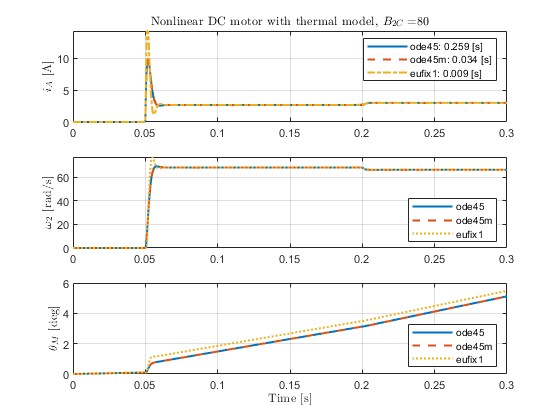

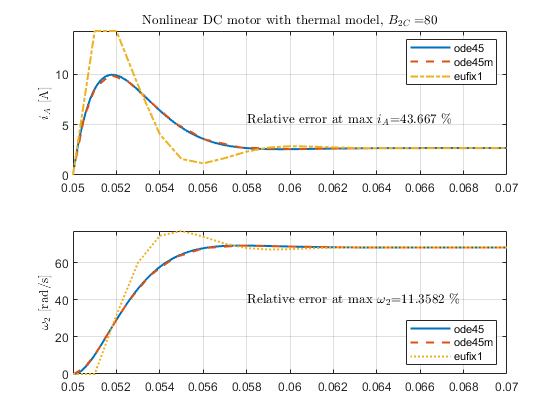

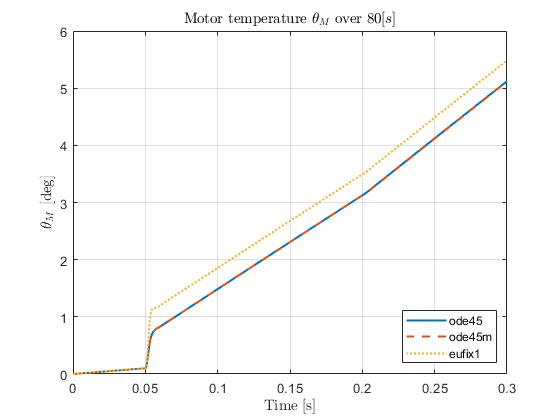

In [5]:
clear variables; close all; clc;
cd C:/Users/zurit/OneDrive/blog/files/Nonlinear_DCmotor
global E_0 Tau_L0 T_Amb B_2C;

E_0 = 120; % [V]        120
Tau_L0 = 80; % [N.m]    80
T_Amb = 18; % [deg]     18
B_2C = 80; % [N]        80/300

t0 = 0; tfinal = 0.3; step = 1e-3;
x0 = [0; 0; 0]; % initial conditions

input_type = 0; % 0=constant, 1=sinusoidal
%% ode45 vs ode45m vs eufix1

timer = clock; 
[t1,x1] = ode45('asst02_2017',[t0, tfinal],x0);
Tsim1 = etime(clock,timer);  % integration time 
Len1 = length(t1);           % number of time-steps 

timer = clock;
[t2,x2] = ode45m('asst02_2017',t0,tfinal,x0,step);
Tsim2 = etime(clock,timer);  % integration time 
Len2 = length(t2);           % number of time-steps

timer = clock;
[t3,x3] = eufix1('asst02_2017',[t0 tfinal],x0,step);
Tsim3 = etime(clock,timer);  % integration time 
Len3 = length(t3);           % number of time-steps

%% Relative error

% relative error at max current: ode45 vs eufix1
max_iA_ode45 = max(x1(:,1)); 
max_iA_eufix1 = max(x3(:,1)); 
max_iA_error = 100*abs( (max_iA_ode45-max_iA_eufix1)/max_iA_ode45 ) ; 

% relative error at max angular velocity: ode45 vs eufix1
max_omega2_ode45 = max(x1(:,2)); 
max_omega2_eufix1 = max(x3(:,2)); 
max_omega2_error = 100*abs( (max_omega2_ode45-max_omega2_eufix1)/max_omega2_ode45 ); 

%% Plotting
if input_type == 0
    %% Constant input e_i=E0
    figure;
        subplot(3,1,1);       
        plot(t1,x1(:,1),t2,x2(:,1),'--',t3,x3(:,1),'-.','LineWidth',1.5);
        title(['Nonlinear DC motor with thermal model, $B_{2C}=$',num2str(B_2C)],'Interpreter','Latex');
        ylabel('$i_A$ [A]','Interpreter','Latex');
        legend(['ode45: ',num2str(Tsim1),' [s]'],['ode45m: ',num2str(Tsim2),' [s]'],['eufix1: ',num2str(Tsim3),' [s]']);
        grid on;

        subplot(3,1,2);       
        plot(t1,x1(:,2),t2,x2(:,2),'--',t3,x3(:,2),':','LineWidth',1.5);
        ylabel('$\omega_2$ [rad/s]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;

        subplot(3,1,3);      
        plot(t1,x1(:,3),t2,x2(:,3),'--',t3,x3(:,3),':','LineWidth',1.5);
        xlabel('Time [s]','Interpreter', 'Latex');
        ylabel('$\theta_M$ [deg]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;
    
    % print('../asst02_2017/sinE0_ode45-ode45m-eufix1_1e-4.png', '-dpng', '-r300'); % Save as PNG with 300 DPI 

    figure;
        subplot(2,1,1);
        plot(t1,x1(:,1),t2,x2(:,1),'--',t3,x3(:,1),'-.','LineWidth',1.5);
        title(['Nonlinear DC motor with thermal model, $B_{2C}=$',num2str(B_2C)],'Interpreter','Latex');
        ylabel('$i_A$ [A]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1');
        axis([0.05 0.07 -inf inf]);
        text(0.058,5.5,['Relative error at max $i_{A}$=',num2str(max_iA_error),' $\%$'],'Interpreter','Latex');
        grid on;

        subplot(2,1,2);       
        plot(t1,x1(:,2),t2,x2(:,2),'--',t3,x3(:,2),':','LineWidth',1.5);
        ylabel('$\omega_2$ [rad/s]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        axis([0.05 0.07 -inf inf]);
        text(0.058,40,['Relative error at max $\omega_{2}$=',num2str(max_omega2_error),' $\%$'],'Interpreter','Latex');
        grid on;

    figure;
        plot(t1,x1(:,3),t2,x2(:,3),'--',t3,x3(:,3),':','LineWidth',1.5);
        title('Motor temperature $\theta_M$ over $80[s]$','Interpreter','Latex');
        xlabel('Time [s]','Interpreter', 'Latex');
        ylabel('$\theta_M$ [deg]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;

elseif input_type == 1
    %% Sinusoidal input e_i

    figure;
        subplot(3,1,1);       
        plot(t1,x1(:,1),t2,x2(:,1),'--',t3,x3(:,1),'-.','LineWidth',1.5);
        title(['Nonlinear DC motor with thermal model, $B_{2C}=$',num2str(B_2C)],'Interpreter','Latex');
        ylabel('$i_A$ [A]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;

        subplot(3,1,2);       
        plot(t1,x1(:,2),t2,x2(:,2),'--',t3,x3(:,2),':','LineWidth',1.5);
        ylabel('$\omega_2$ [rad/s]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;

        subplot(3,1,3);      
        plot(t1,x1(:,3),t2,x2(:,3),'--',t3,x3(:,3),':','LineWidth',1.5);
        xlabel('Time [s]','Interpreter', 'Latex');
        ylabel('$\theta_M$ [deg]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;

    figure;
        subplot(3,1,1);
        plot(t1,x1(:,2),t2,x2(:,2),'--',t3,x3(:,2),'-.','LineWidth',1.5);
        title(['Stiction behaviour on $\omega_2$, $B_{2C}=$',num2str(B_2C)],'Interpreter','Latex');
        ylabel('$\omega_2$ [rad/s]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        axis([0.148 0.157 -0.6 0.4]);
        grid on;

        subplot(3,1,2);       
        plot(t1,x1(:,2),t2,x2(:,2),'--',t3,x3(:,2),':','LineWidth',1.5);
        ylabel('$\omega_2$ [rad/s]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        axis([0.148 0.157 -0.015 0.010]);
        grid on;

        subplot(3,1,3);
        plot(t1,x1(:,2),t2,x2(:,2),'--',t3,x3(:,2),'-.','LineWidth',1.5);
        xlabel('Time [s]','Interpreter', 'Latex');
        ylabel('$\omega_2$ [rad/s]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        axis([0.148 0.157 -11e-5 5e-5]);
        grid on;

    figure;
        plot(t1,x1(:,3),t2,x2(:,3),'--',t3,x3(:,3),':','LineWidth',1.5);
        title('Motor temperature $\theta_M$ over $80[s]$','Interpreter','Latex');
        xlabel('Time [s]','Interpreter', 'Latex');
        ylabel('$\theta_M$ [deg]','Interpreter','Latex');
        legend('ode45','ode45m','eufix1','Location','southeast');
        grid on;

end



# Simulation Scenarios
Two types of scenarios are simulated. The first one is submitted to a constant input, low stiction, and two step sizes. The second scenario is more interesting because we study the behaviour due to a sinusoidal input which emulates the reversing mode of the motor at $5[Hz]$ with higher stiction. Both scenarios have load torque at $t=0.2[s]$.

<center>Table 1: Scenario 1 and 2 </center>

|  		| Scenario 1 	| Scenario 2 |
|:-----:|:-------------|:----------|
|`ode45m` step size | $1\times 10^{-3}$ and $1\times 10^{-4}$ | $1\times 10^{-4}$ |
|`eufix1` step size | $1\times 10^{-3}$ and $1\times 10^{-4}$ | $1\times 10^{-4}$ |
|`ode45` step size | auto | auto |
| $e_i$ | $E_0$ | $E_0 \sin[5(2\pi)(t-0.05)]$ |
| $E_0$ | $120~[V]$ | $120~[V]$ |
| $\tau_{L}$ | $80~[N m]$ at $t=0.2[s]$} | $80~[N m]$ at $t=0.2[s]$ |
| $\theta_A$ | $18~[°C]$ | $18~[°C]$ |
| $B_{2C}$ | $80~[N]$ | $300~[N]$ |



# Simulation Results
## Scenario 1
The result in Fig. 1 shows the output states due to constant input $E_0=120$, and $B_{2C}=80$. The current overshoot at $0.05[s]$ is due to the inertia that the motor has to overcome. After the inertia is broken, the current $i_A$ drops down to a constant value. The load torque $\tau_{L}$ is applied at $0.2[s]$ which produces the increment in the current and the decrement in the angular velocity. Also, `eufix1` solves the system with noticeable error, this result is analyzed later.

<figure>
    <img src="/images/Nonlinear_DCmotor/E0_ode45-ode45m-eufix1_1e-3.png" alt="Fig1" width="70%"/>
    <center><figcaption>Fig. 1 - Scenario 1: step size $1\times 10^{-3}$</figcaption></center>
</figure> 

The time simulation of each solver indicates that `ode45` is 10 times slower than `ode45m` and 30 times slower than `eufix1`. 

<center>Table 2: Scenario 1: simulation time and number of steps. </center>

|  		                | `ode45` 	 | `ode45m` | `eufix1` |
|:---------------------:|:----------:|:--------:|:--------:|
| simulation time [s]   | $0.267$    | $0.025$  | $0.009$  |			
| number of time steps  | $71769$    | $15133$  | $80001$  |


The temperature of the motor $\theta_M$ increases linearly and reaches steady-state at $45[s]$ approximately, which indicates that the motor won't reach unsafe temperatures.

<figure>
    <img src="/images/Nonlinear_DCmotor/thetaM_ode45-ode45m-eufix1_1e-3.png" alt="Fig2" width="60%"/>
    <center><figcaption>Fig. 2 - Scenario 1: $\theta_M$ over $80[s]$ </figcaption></center>
</figure> 

Although, `eufix1` is the fastest solver, with step size of $1\times 10^{-3}$, `eufix1` outputs the worst performance. The result can be improved if the steps size is decreased to $1\times 10^{-4}$. Fig. 3 and Fig. 4 show the relative error at max current and max angular velocity between `ode45` and `eufix1`.

<figure>
    <img src="/images/Nonlinear_DCmotor/E0_ode45-ode45m-eufix1_1e-3_zoom.png" alt="Fig3" width="70%"/>
    <center><figcaption>Fig. 3 - Scenario 1: step size $1\times 10^{-3}$ </figcaption></center>
</figure> 

<figure>
    <img src="/images/Nonlinear_DCmotor/E0_ode45-ode45m-eufix1_1e-4_zoom.png" alt="Fig4" width="70%"/>
    <center><figcaption>Fig. 4 - Scenario 1: step size $1\times 10^{-4}$ </figcaption></center>
</figure> 

## Scenario 2
In this scenario we submitted the DC motor to high stiction $B_{2C}=300$ and sinsusoidal input at $5[Hz]$ which simulates the reversing mode. Table 3 shows the output for the three solvers showing that `ode45` is the slowest by far.

<center>Table 3: Scenario 2: simulation time and number of steps. </center>

|  		                | `ode45` 	 | `ode45m` | `eufix1` |
|:---------------------:|:----------:|:--------:|:--------:|
| simulation time [s]   | $517.798$  | $3.463$  | $0.093$  |			
| number of time steps  | $13559913$ | $9647$   | $3002$   |

Fig. 5 shows the simulation output. The relevant result is the behavior of the system around the (nonlinear) stiction. $\omega_2$ sticks at $0.15[s]$ and $0.25[s]$ due to $B_{2C}$. 

<figure>
    <img src="/images/Nonlinear_DCmotor/sinE0_ode45-ode45m-eufix1_1e-4.png" alt="Fig5" width="70%"/>
    <center><figcaption>Fig. 5 - Scenario 2: reversing mode. </figcaption></center>
</figure> 

Even though the solvers were able to solve the dynamics with stiction, `ode45` took too much time to overcome this nonlinearity. Fig. 6 shows the stiction with three different zoom levels for each solver. The fastest but with more integration step error is `eufix1`. `ode45m` has less error $\pm 0.01$, and finally `ode45` solves with the minimum error, around $\pm 10\times 10^{-5}$. In conclusion, `ode45m` is the best choice against the rest because it can obtain the solution with low error and with decent speed.

<figure>
    <img src="/images/Nonlinear_DCmotor/sinE0_ode45-ode45m-eufix1_1e-4_zoom.png" alt="Fig6" width="70%"/>
    <center><figcaption>Fig. 6 - Scenario 2: stiction behavior at $0.148\leq t \leq 0.157$. </figcaption></center>
</figure> 

The motor temperature $\theta_M$ in reversing mode reaches the steady-state at $45[s]$ approximately which indicates the motor won't suffer overheat due to stiction. 

<figure>
    <img src="/images/Nonlinear_DCmotor/sinE0_thetaM_ode45-ode45m-eufix1_1e-4.png" alt="Fig7" width="60%"/>
    <center><figcaption>Fig. 7 - Scenario 2: motor temperature. </figcaption></center>
</figure> 